In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# importing the data 
df = pd.read_csv('gcar_data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


### First step : data claning

In [6]:
df.shape

(100000, 15)

In [7]:
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  object 
 1   model                     100000 non-null  object 
 2   color                     99924 non-null   object 
 3   registration_date         99999 non-null   object 
 4   year                      100000 non-null  object 
 5   price_in_euro             100000 non-null  object 
 6   power_kw                  99925 non-null   object 
 7   power_ps                  99928 non-null   object 
 8   transmission_type         100000 non-null  object 
 9   fuel_type                 100000 non-null  object 
 10  fuel_consumption_l_100km  88761 non-null   object 
 11  fuel_consumption_g_km     100000 non-null  object 
 12  mileage_in_km             99932 non-null   float64
dtypes: float64(1), object(12)
memory usage: 9.9+ 

In [31]:
df.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
dtype: object

In [3]:
df.fillna(0,inplace = True)

In [4]:
df.isnull().any()

Unnamed: 0                  False
brand                       False
model                       False
color                       False
registration_date           False
year                        False
price_in_euro               False
power_kw                    False
power_ps                    False
transmission_type           False
fuel_type                   False
fuel_consumption_l_100km    False
fuel_consumption_g_km       False
mileage_in_km               False
offer_description           False
dtype: bool

In [10]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [32]:
df[df['registration_date'].isna() == 1]

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
92239,ford,Ford Puma,white,NaN,32.250 km,Navi,Petrol,2020,Manual,19450,08/2020,Manual,NaN


In [3]:
# droping columns
df.drop(columns = [ 'Unnamed: 0', 'offer_description'], inplace=True)


### second step : Data analyzing

In [27]:
df.describe()

,mileage_in_km
count,9.993200e+04
mean,8.559891e+04
std,7.929713e+04
min,0.000000e+00
25%,2.550000e+04
50%,6.800000e+04
75%,1.270000e+05
max,3.800000e+06


In [6]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,0,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [45]:
df['brand'].unique()

array(['ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
       'citroen', 'alfa-romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
       'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
       'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
       'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'], dtype=object)

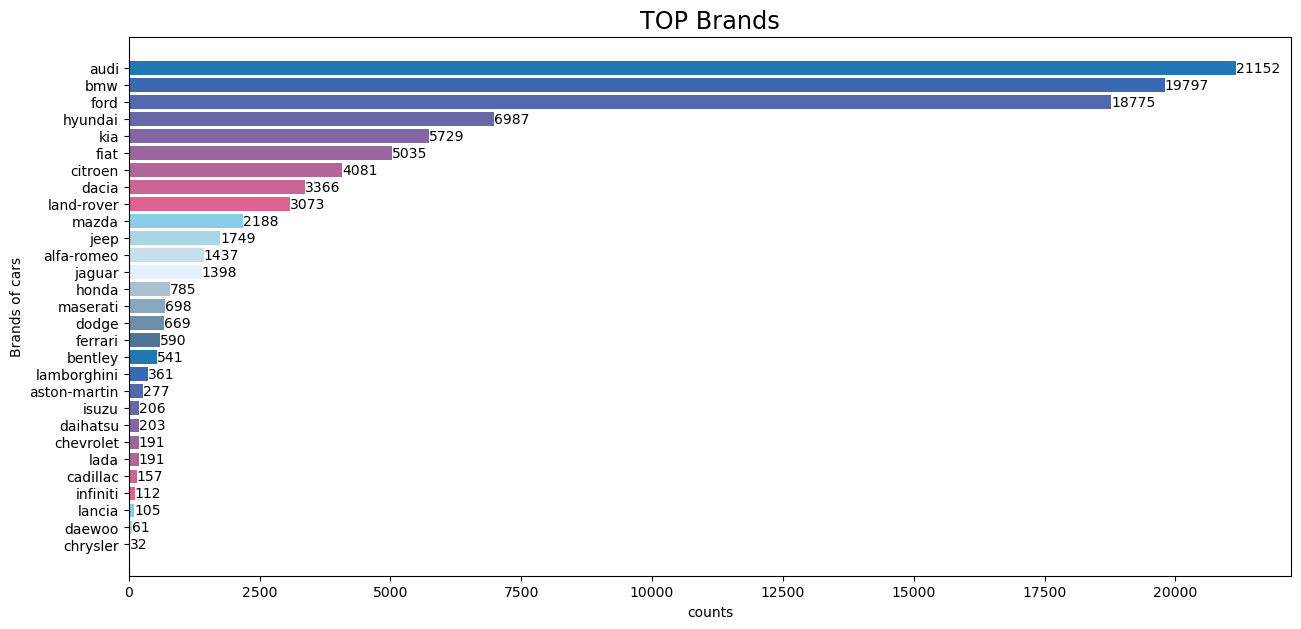

In [44]:
brand_count = df['brand'].value_counts()

itemValue = brand_count.values
itemName = brand_count.index
colors = ['#1f77b4', '#396ab1', '#5169ac', '#6968a7', '#8167a3',
          '#99669e', '#b16699', '#c86594', '#e0638f', '#87ceeb',
                '#a7d6e6', '#c6dfea', '#e6f0ff', '#aac0d1', 
          '#89a7bf', '#6c8eab', '#4e7598']

    
plt.figure(figsize=(15,7))
plt.barh(itemName, itemValue, color = colors)

plt.title('TOP Brands', fontsize = 'xx-large')
plt.xlabel('counts')
plt.ylabel('Brands of cars')

for i in range (len(itemName)):
    plt.text(itemValue[i], i,itemValue[i], ha= 'left', va='center')

plt.gca().invert_yaxis()
plt.show()

In [8]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,0,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


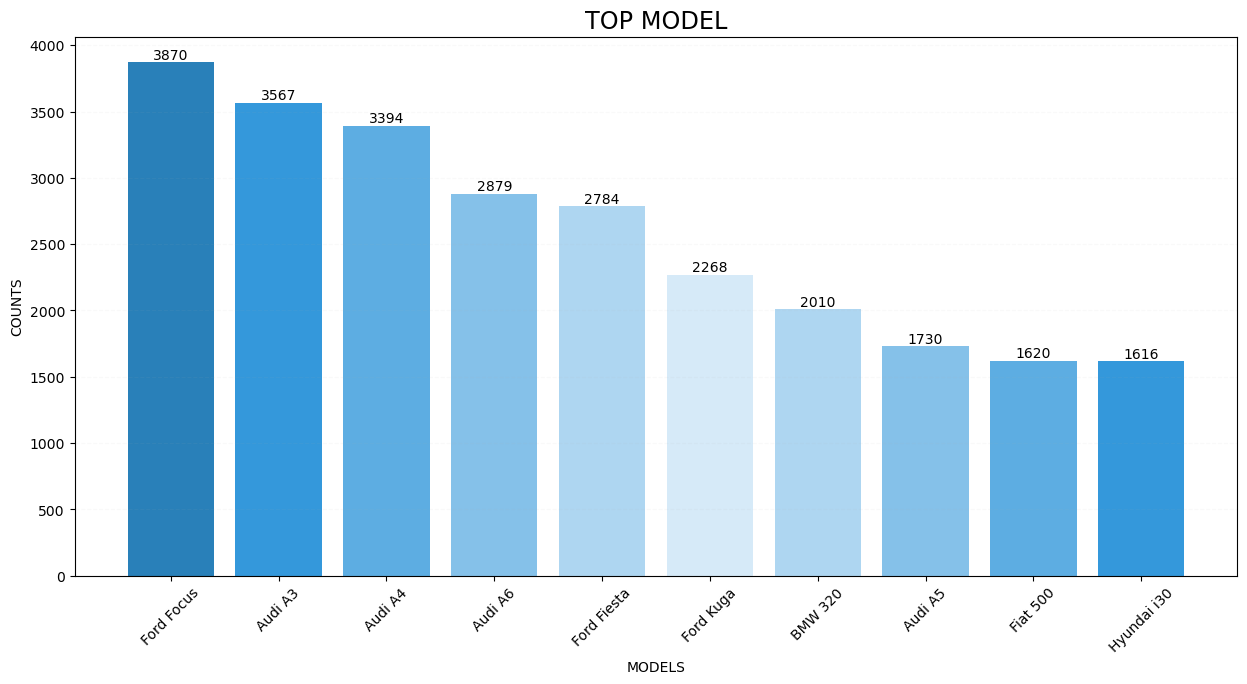

In [40]:
model_counts = df['model'].value_counts()
A = model_counts.values[:10]
B = model_counts.index[:10]
colors = ['#2980B9', '#3498DB', '#5DADE2', '#85C1E9', '#AED6F1', 
          '#D6EAF8', '#AED6F1', '#85C1E9', '#5DADE2', '#3498DB']



plt.figure(figsize=(15, 7))
plt.bar(B, A, color = colors)
plt.title('TOP MODEL', fontsize= 'xx-large')
plt.xlabel('MODELS')
plt.ylabel('COUNTS')

for i in range(len(B)):
    plt.text(i, A[i], A[i], 
            ha='center', va ='bottom')

plt.xticks(rotation=45)
plt.grid(axis ='y', linestyle='--', alpha=0.07)

plt.show()

In [93]:
df['model'].value_counts().sort_values(ascending = False)

model
Ford Focus         3875
Audi A3            3567
Audi A4            3397
Audi A6            2880
Ford Fiesta        2785
                   ... 
Mazda Tribute         1
Hyundai SONATA        1
Lada Priora           1
Dodge Avenger         1
Ferrari Mondial       1
Name: count, Length: 590, dtype: int64

color
black     24124
grey      19696
white     17263
blue      12678
silver    11724
red        8120
brown      1745
green      1405
orange     1150
yellow      806
beige       723
gold        190
bronze      158
violet      142
0            76
Name: count, dtype: int64

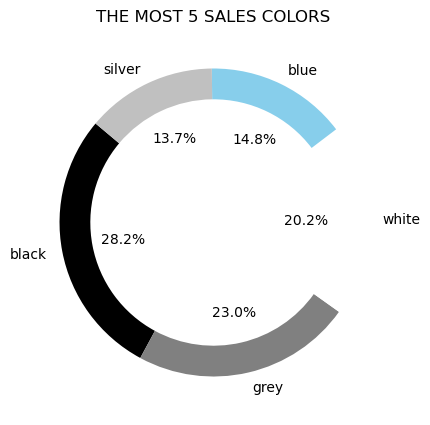

In [48]:
colors_choosing = df['color'].value_counts()

itemValue = colors_choosing.values[:5]
itemName = colors_choosing.index.astype(str)[:5]
colors = ['black', 'grey', 'white', 'skyblue', 'silver']
explode = (0,0,0,0,0)


plt.figure(figsize=(5,5))
plt.pie(itemValue, labels = itemName, explode = explode, colors = colors
        , autopct = '%1.1f%%', startangle= 140, wedgeprops= dict(width=0.2))

plt.title('THE MOST 5 SALES COLORS')



plt.show()

In [11]:
# Convert all NaN values to 0
df.fillna(0, inplace=True)

In [9]:
# Delete all rows containing NaN values
df.dropna(inplace=True)

In [13]:
# Remove rows containing non-numeric values
df = df.dropna(subset=['price_in_euro'])

# Convert the column to integer
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

# Drop rows with NaN values in the 'price_in_euro' column
df = df.dropna(subset=['price_in_euro'])

# Now, convert other columns to integer
df['power_kw'] = df['power_kw'].astype('int64')
df['power_ps'] = df['power_ps'].astype('int64')
df['mileage_in_km'] = df['mileage_in_km'].astype('int64')


In [26]:
df.describe().astype('int64')

,price_in_euro,power_kw,power_ps,mileage_in_km
count,99946,99946,99946,99946
mean,29416,140,190,85579
std,47775,82,112,79303
min,150,0,0,0
25%,12900,88,120,25500
50%,20490,116,158,68000
75%,32480,160,218,127000
max,5890500,735,999,3800000


In [27]:
df['transmission_type'].unique()

array(['Automatic', 'Manual', 'Unknown', 'Semi-automatic'], dtype=object)

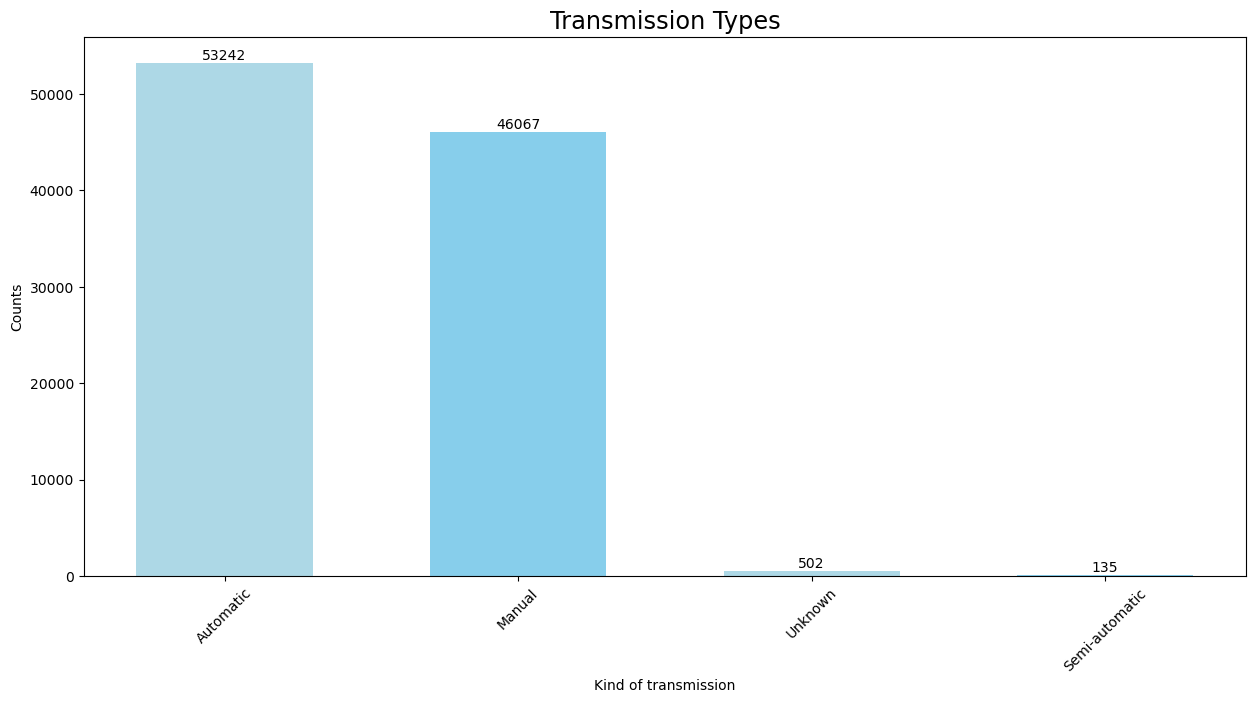

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

df['transmission_type'].value_counts()
itemName = df['transmission_type'].value_counts().index
itemValue = df['transmission_type'].value_counts().values
colors = ['#ADD8E6', '#87CEEB']


plt.bar(itemName, itemValue, width = 0.6, color = colors)


plt.title('Transmission Types', fontsize='xx-large')
plt.xlabel('Kind of transmission')
plt.ylabel('Counts')

for i in range(len(itemName)):
    plt.text(i, itemValue[i], itemValue[i], ha='center', va ='bottom')

plt.xticks(rotation=45)
plt.show()

In [65]:
df['fuel_type'].unique()

array(['Hybrid', 'Petrol', 'Electric', 'Diesel', 'LPG', 'Diesel Hybrid',
       'Other', 'CNG', 'Unknown', 'Hydrogen', 'Ethanol'], dtype=object)

In [66]:
df['fuel_type'].value_counts()

fuel_type
Petrol           54290
Diesel           37593
Hybrid            4291
Electric          2467
LPG                930
Diesel Hybrid      137
Other               84
CNG                 61
Unknown             45
Hydrogen            39
Ethanol              9
Name: count, dtype: int64

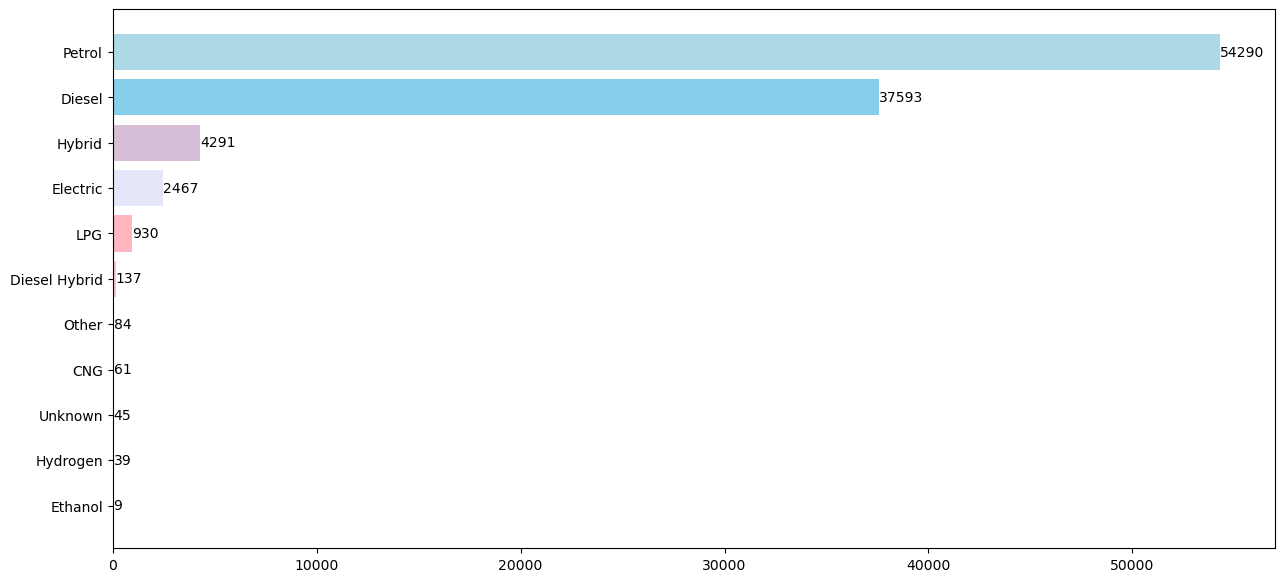

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7)) 
itemName= df['fuel_type'].value_counts().index
itemValue =  df['fuel_type'].value_counts().values
colors = ['#ADD8E6', '#87CEEB', '#D8BFD8', '#E6E6FA', '#FFB6C1', '#FFC0CB']


plt.barh(itemName,itemValue, color = colors)

for i in range(len(itemName)):
    plt.text(itemValue[i],i, itemValue[i], ha='left', va='center')

plt.gca().invert_yaxis()

plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [178]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490.0,140.0,190.0,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555.0,49.0,67.0,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886.0,125.0,170.0,Automatic,Electric,0,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490.0,114.0,155.0,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990.0,110.0,150.0,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [14]:
df.describe().astype('int64')

,price_in_euro,power_kw,power_ps,mileage_in_km
count,99946,99946,99946,99946
mean,29416,140,190,85579
std,47775,82,112,79303
min,150,0,0,0
25%,12900,88,120,25500
50%,20490,116,158,68000
75%,32480,160,218,127000
max,5890500,735,999,3800000


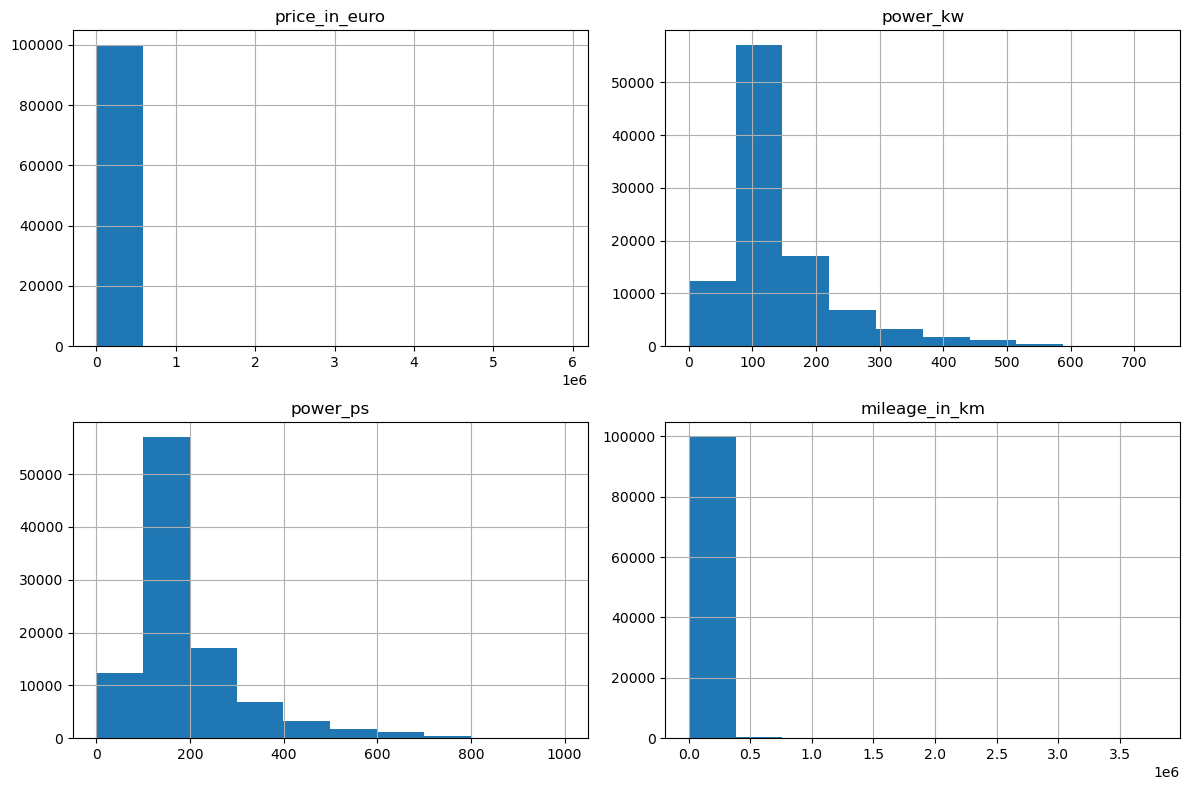

In [138]:
import matplotlib.pyplot as plt

# Create histograms for each numerical column

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

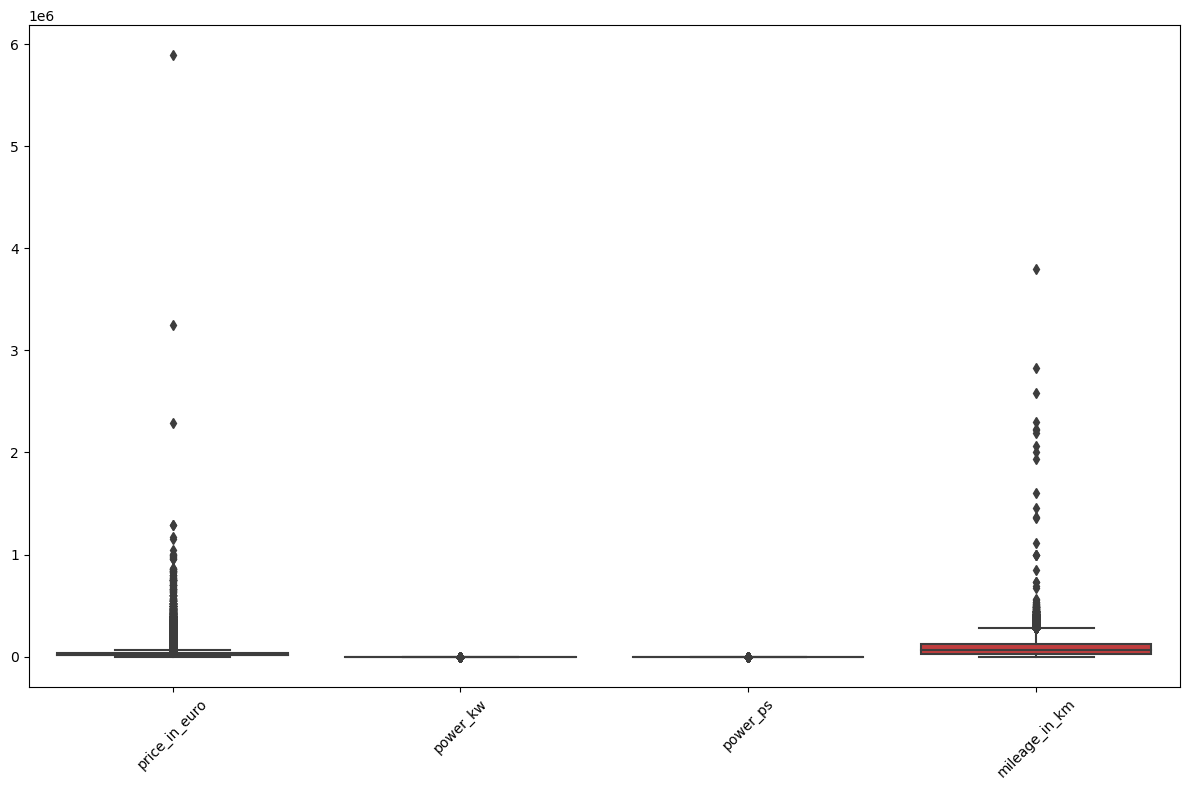

In [31]:
import seaborn as sns

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


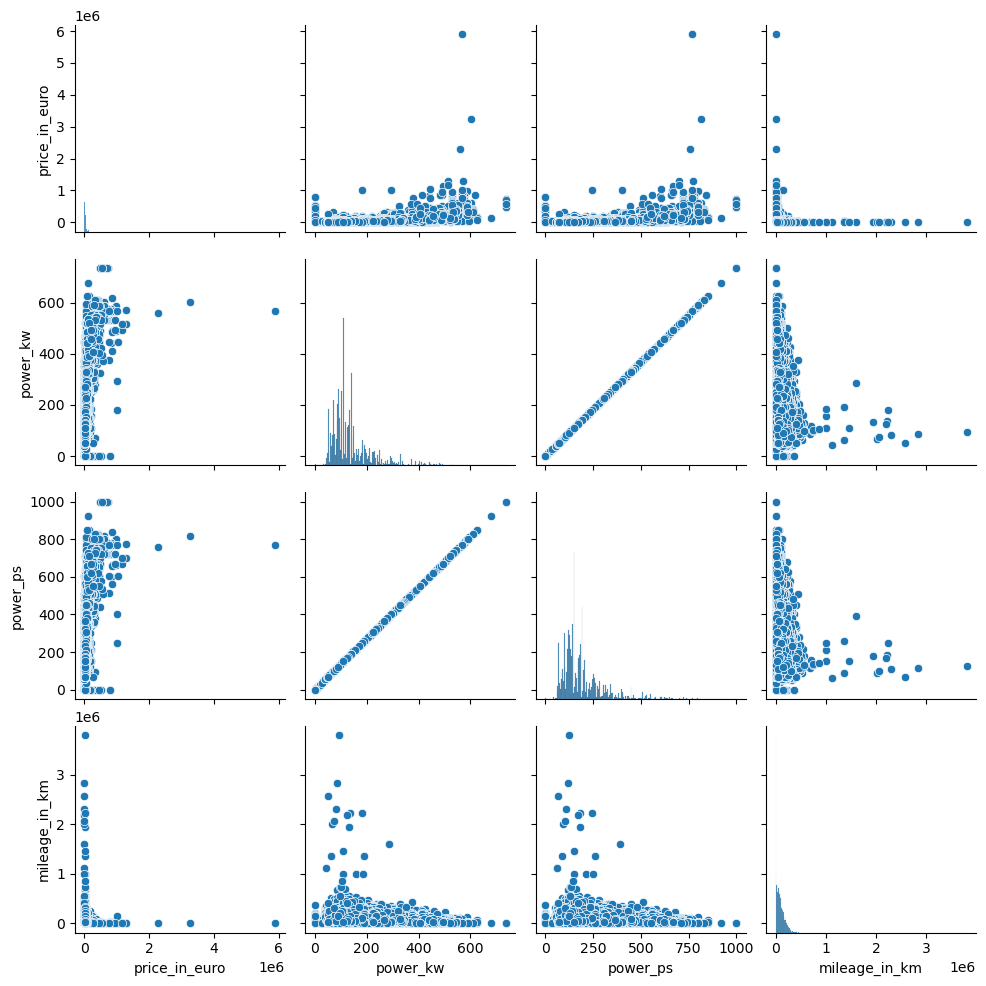

In [37]:
# Create scatter plots for pairs of numerical columns
sns.pairplot(df)
plt.show()